In [1]:
import pandas as pd
import numpy as np

In [2]:
abitanti_veneto = pd.Series([
    840.153, 
    198.725, 
    931.290, 
    229.376, 
    877.405, 
    927.682, 
    853.460]
)

In [3]:
print(abitanti_veneto)

0    840.153
1    198.725
2    931.290
3    229.376
4    877.405
5    927.682
6    853.460
dtype: float64


Le Series possono avere un nome, per comodità.

In [5]:
abitanti_veneto.name = 'Numero abitanti Veneto per provincia'
print(abitanti_veneto)

0    840.153
1    198.725
2    931.290
3    229.376
4    877.405
5    927.682
6    853.460
Name: Numero abitanti Veneto per provincia, dtype: float64


Hanno molti aspetti in comune con i numpy array.

In [4]:
print(abitanti_veneto.dtype)
# al loro interno sono array n-dimensionali!
print(abitanti_veneto.values, type(abitanti_veneto.values))

float64
[840.153 198.725 931.29  229.376 877.405 927.682 853.46 ] <class 'numpy.ndarray'>


In genere, il comportamento è più simile a un dizionario (ad un ordered_dict, per essere precisi) che ad un array! Posso definire le chiavi che preferisco.

In [6]:
abitanti_veneto.name = 'Numero abitanti Veneto per provincia'
abitanti_veneto.index = [
'Venezia',
'Belluno',
'Padova',
'Rovigo',
'Treviso',
'Verona',
'Vicenza',
]
print(abitanti_veneto)

Venezia    840.153
Belluno    198.725
Padova     931.290
Rovigo     229.376
Treviso    877.405
Verona     927.682
Vicenza    853.460
Name: Numero abitanti Veneto per provincia, dtype: float64


Se mi torna comodo posso crearle direttamente da un dizionario

In [7]:
abitanti_veneto = pd.Series({
        'Venezia': 840.153,
        'Belluno' :198.725,
        'Padova' : 931.290,
        'Rovigo' : 229.376,
        'Treviso' : 877.405,
        'Verona': 927.682,
        'Vicenza': 853.460},
    name='Numero abitanti Veneto per provincia')
print(abitanti_veneto)

Venezia    840.153
Belluno    198.725
Padova     931.290
Rovigo     229.376
Treviso    877.405
Verona     927.682
Vicenza    853.460
Name: Numero abitanti Veneto per provincia, dtype: float64


Posso anche creare delle sottoserie a partire dall'originale

In [7]:
pd.Series(abitanti_veneto, index=[
    'Verona', 'Vicenza', 'Padova', 'Milano', 'Venezia'])

Verona     927.682
Vicenza    853.460
Padova     931.290
Milano         NaN
Venezia    840.153
Name: Numero abitanti Veneto per provincia, dtype: float64

In [8]:
# indexing (ritorna un singolo valore)
print(abitanti_veneto['Verona'])

927.682


In [9]:
# multiplo (ritorna un'altra series)
print(abitanti_veneto[['Rovigo', 'Verona']])

Rovigo    229.376
Verona    927.682
Name: Numero abitanti Veneto per provincia, dtype: float64


Posso usare fancy indexing (indici booleani)

In [11]:
print(abitanti_veneto > 800.000)

Venezia     True
Belluno    False
Padova      True
Rovigo     False
Treviso     True
Verona      True
Vicenza     True
Name: Numero abitanti Veneto per provincia, dtype: bool


In [12]:
print(abitanti_veneto[abitanti_veneto>800.000])

Venezia    840.153
Padova     931.290
Treviso    877.405
Verona     927.682
Vicenza    853.460
Name: Numero abitanti Veneto per provincia, dtype: float64


In [13]:
print(abitanti_veneto[(abitanti_veneto > 900.000) | (abitanti_veneto < 200.000)])

Belluno    198.725
Padova     931.290
Verona     927.682
Name: Numero abitanti Veneto per provincia, dtype: float64


In [14]:
print(abitanti_veneto[(abitanti_veneto < 900.000) & (abitanti_veneto > 200.000)])

Venezia    840.153
Rovigo     229.376
Treviso    877.405
Vicenza    853.460
Name: Numero abitanti Veneto per provincia, dtype: float64


In [10]:
print(abitanti_veneto.mean())
print(20*'-')
print(abitanti_veneto[abitanti_veneto > abitanti_veneto.mean()])

694.0129999999999
--------------------
Venezia    840.153
Padova     931.290
Treviso    877.405
Verona     927.682
Vicenza    853.460
Name: Numero abitanti Veneto per provincia, dtype: float64


In [19]:
abitanti_veneto.max()
max_mask = abitanti_veneto == abitanti_veneto.max()
min_mask = abitanti_veneto == abitanti_veneto.min()
abitanti_veneto[max_mask | min_mask]

Belluno    198.725
Padova     931.290
Name: Numero abitanti Veneto per provincia, dtype: float64

In [16]:
abitanti_veneto.describe()

count      7.00000
mean     694.01300
std      329.77573
min      198.72500
25%      534.76450
50%      853.46000
75%      902.54350
max      931.29000
Name: Numero abitanti Veneto per provincia, dtype: float64

In [20]:
# lettura da csv, supporta molti altri formati
clima = pd.read_csv(filepath_or_buffer='dati_climatici.csv',sep=';')

In [21]:
clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   giorno       31 non-null     object
 1   temperatura  31 non-null     int64 
 2   vel_vento    31 non-null     int64 
 3   evento       31 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


In [22]:
clima.head(2)

,giorno,temperatura,vel_vento,evento
0,01/01/17,32,6,Pioggia
1,02/01/17,35,7,Sole


In [23]:
clima[clima['temperatura'] > 30]

,giorno,temperatura,vel_vento,evento
0,01/01/17,32,6,Pioggia
1,02/01/17,35,7,Sole
4,05/01/17,32,4,Pioggia
5,06/01/17,31,2,Sole
6,07/01/17,31,2,Sole
13,14/01/17,32,6,Pioggia
14,15/01/17,35,7,Sole
17,18/01/17,32,4,Pioggia
18,19/01/17,31,2,Sole
19,20/01/17,31,2,Sole


In [24]:
# posso chiamare 'temperatura' come indice o come attributo
clima[clima['temperatura'] <= 30]
# identico!
clima[clima.temperatura <= 30]

,giorno,temperatura,vel_vento,evento
2,03/01/17,28,2,Neve
3,04/01/17,24,7,Neve
7,08/01/17,30,3,Sole
8,09/01/17,29,4,Sole
9,10/01/17,28,5,Pioggia
10,11/01/17,27,6,Pioggia
11,12/01/17,25,7,Pioggia
12,13/01/17,24,8,Neve
15,16/01/17,28,2,Neve
16,17/01/17,24,7,Neve


In [25]:
clima[(clima.evento=="Pioggia") & (clima.temperatura>30) ]

,giorno,temperatura,vel_vento,evento
0,01/01/17,32,6,Pioggia
4,05/01/17,32,4,Pioggia
13,14/01/17,32,6,Pioggia
17,18/01/17,32,4,Pioggia
26,27/01/17,32,6,Pioggia
30,31/01/17,32,4,Pioggia


In [28]:
clima[(clima.evento=="Neve") | (clima.temperatura<26) ]

,giorno,temperatura,vel_vento,evento
2,03/01/17,28,2,Neve
3,04/01/17,24,7,Neve
11,12/01/17,25,7,Pioggia
12,13/01/17,24,8,Neve
15,16/01/17,28,2,Neve
16,17/01/17,24,7,Neve
24,25/01/17,25,7,Pioggia
25,26/01/17,24,8,Neve
28,29/01/17,28,2,Neve
29,30/01/17,24,7,Neve


In [29]:
import matplotlib.pyplot as plt

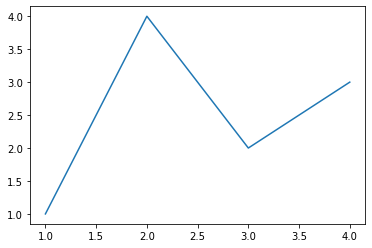

In [30]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

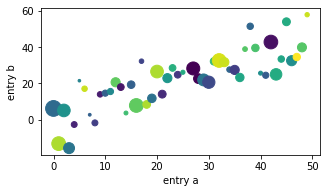

In [25]:
# esempio di stampa
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

<AxesSubplot:>

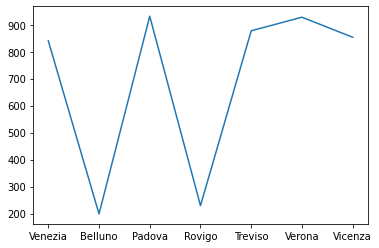

In [26]:
plt.figure()
abitanti_veneto.plot()

<AxesSubplot:>

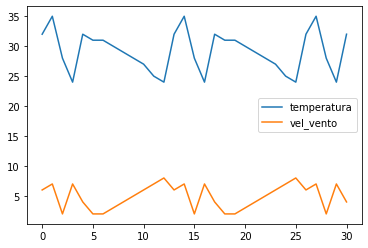

In [27]:
# pandas si integra direttamente!
clima.plot()

<AxesSubplot:>

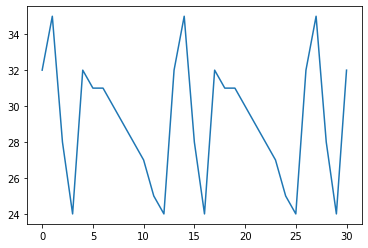

In [28]:
clima.temperatura.plot()

<Figure size 432x288 with 0 Axes>

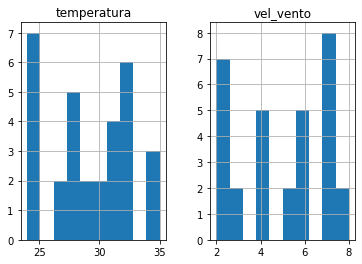

In [29]:
plt.figure()
clima.hist();


<AxesSubplot:xlabel='temperatura', ylabel='vel_vento'>

<Figure size 432x288 with 0 Axes>

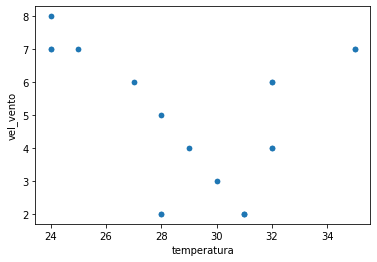

In [30]:
plt.figure(); clima.plot.scatter(x='temperatura', y='vel_vento')

# Cenni di Scikit-learn

In [31]:
from sklearn import datasets

# scikit-learn offre dei dataset di default, utili per sperimentare
digits = datasets.load_digits()

In [32]:
# apprendimento supervisionato: i dati sono etichettati
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [33]:
# valori interni di una cifra
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


0


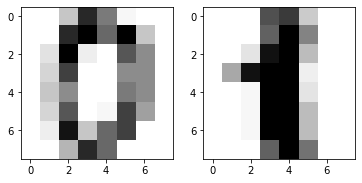

In [34]:
# stampa dell'immagine
plt.figure()

plt.subplot(1, 2, 1) # o plt.subplot(121)
plt.imshow(digits.data[0].reshape(8, 8), cmap='Greys')
plt.subplot(1, 2, 2) # o plt.subplot(121)
plt.imshow(digits.data[1].reshape(8, 8), cmap='Greys')

print(digits.target[0])

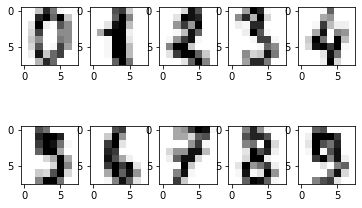

In [35]:
# l'immagine è questa! spesso si lavora con versioni "compatte" dei dati veri
plt.figure()

for c in range(1, 3):
    for r in range(1, 6):
        img = plt.subplot(2, 5, (c-1)*5 + r)
        plt.imshow(digits.data[((c-1)*5 + (r-1))].reshape(8, 8), cmap='Greys')


In [36]:
from sklearn import svm
# clasificatore
clf = svm.SVC(gamma=0.001, C=100.)

In [37]:
# fit addestra il clasificatore
# addestriamo su tutti i dati tranne l'ultimo
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [38]:
clf.predict(digits.data[-1:])

array([8])

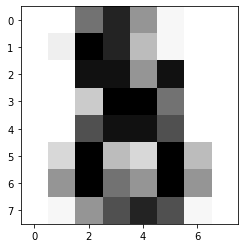

In [39]:
plt.imshow(digits.data[-1:].reshape(8, 8), cmap='Greys')

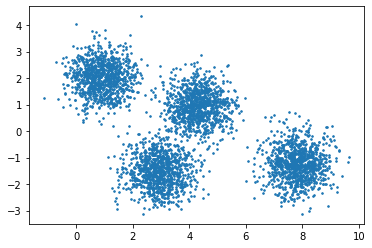

In [40]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
X = X[:, ::-1]

plt.scatter(X[:,0], X[:, 1], marker=".", s=10)

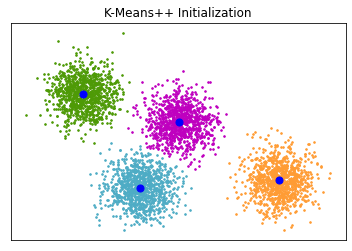

In [41]:
# Calculate seeds from kmeans++
kmean = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(X)

# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = kmean.predict(X) == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)


plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()
